<a href="https://colab.research.google.com/github/lijq33/Data-mining/blob/master/Data_Mining_Assignment_lasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import library

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import dataset

In [0]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [0]:
df_train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [0]:
df_test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [0]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

# Data Pre-processing

In [0]:
df = pd.concat([df_train, df_test]).reset_index(drop=True).copy()

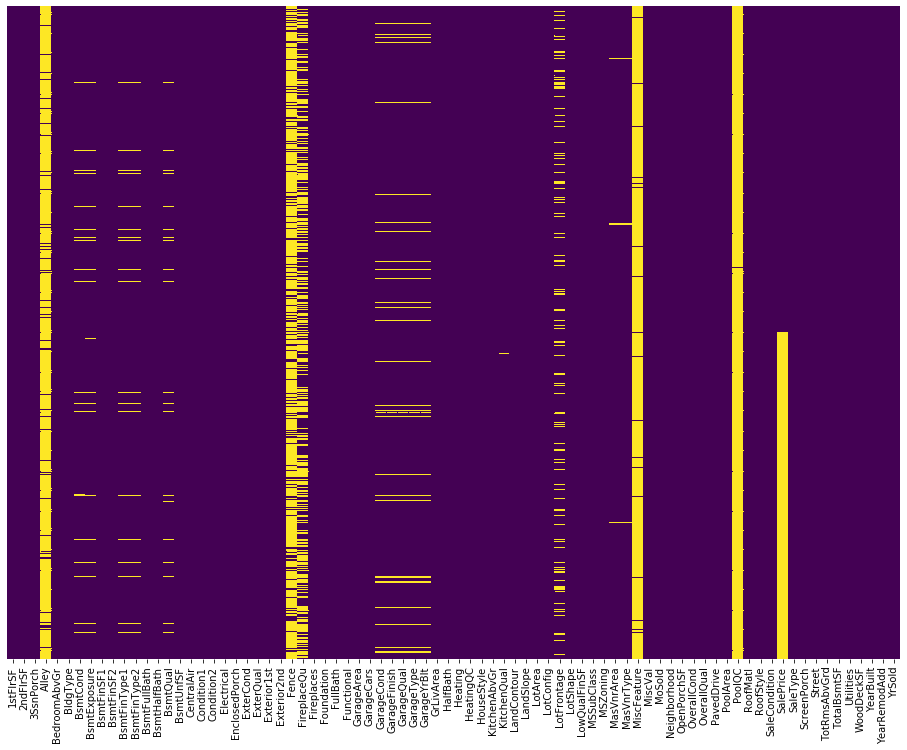

In [0]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

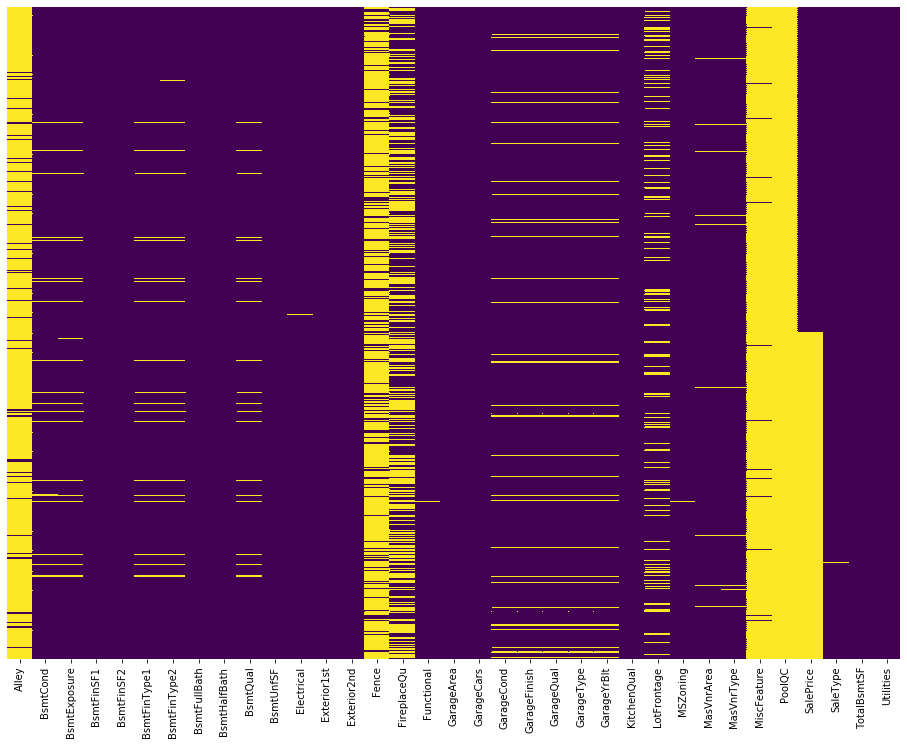

In [0]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df.columns[df.isnull().sum() > 0].tolist()
sns.heatmap(df[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [0]:
print(col_missing_data)

['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF', 'Utilities']


In [0]:
## Data that can be filled based on Domain knowledge
Fill_with_none = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                  'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu',
                  'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
                  'MiscFeature', 'PoolQC', 'MasVnrType', 'Exterior2nd'
                 ] 

Fill_with_zero = [ 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  'BsmtFullBath', 'BsmtHalfBath','GarageArea', 'GarageCars', 
                  'GarageYrBlt', 'MasVnrArea', 'LotFrontage'
                 ]

Fill_with_mode = [ 'Electrical', 'Exterior1st',  'Functional', 
                  'KitchenQual',  'MSZoning', 'SaleType', 'Utilities'
                 ]

for col in Fill_with_none:
    df[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)
    df_train[col].fillna("None", inplace=True)

for col in Fill_with_zero:
    df[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)
    df_train[col].fillna(0, inplace=True)

for col in Fill_with_mode:
    mode = df[col].value_counts().idxmax()
    df[col].fillna(mode, inplace=True)
    df_test[col].fillna(mode, inplace=True)
    df_train[col].fillna(mode, inplace=True)

df.columns[df.isnull().sum() > 0].tolist()

['SalePrice']

# Exploratory Data Analysis

## Numerical

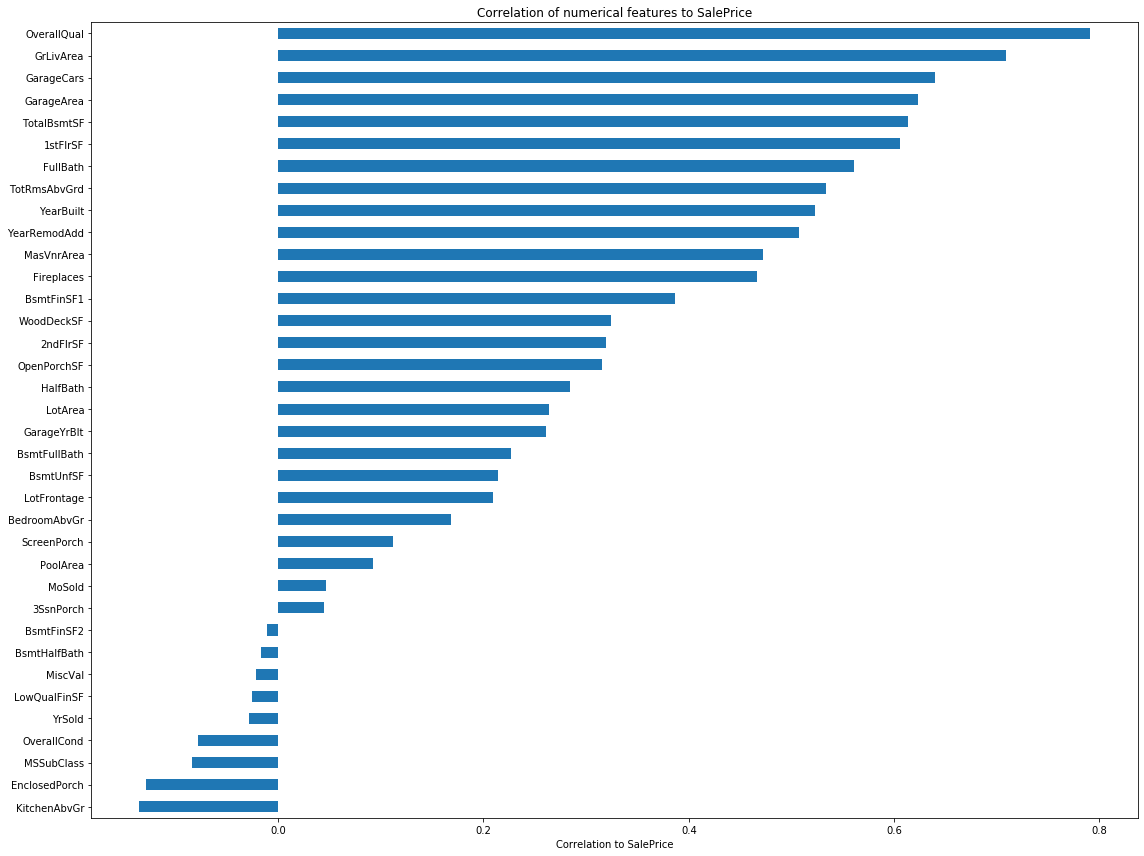

In [0]:
plt.figure(figsize=(16,12));
corr = df_train.corr()['SalePrice']
corr.sort_values(ascending=True)[:-1].plot(kind="barh")

plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

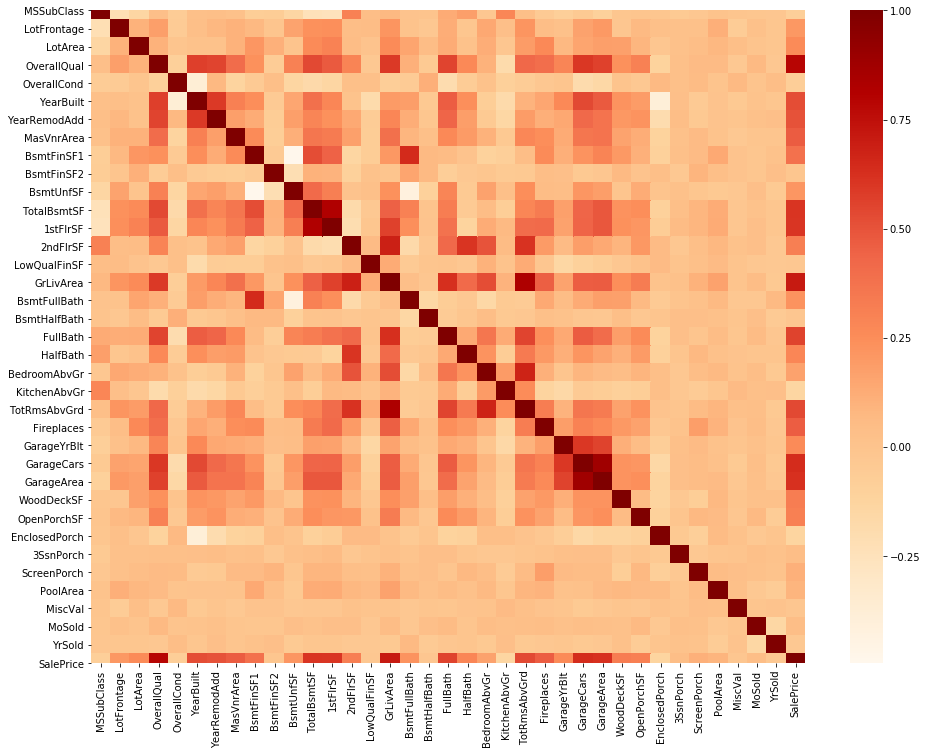

In [0]:
plt.figure(figsize=(16,12));
sns.heatmap(df_train.corr(), cmap = 'OrRd')

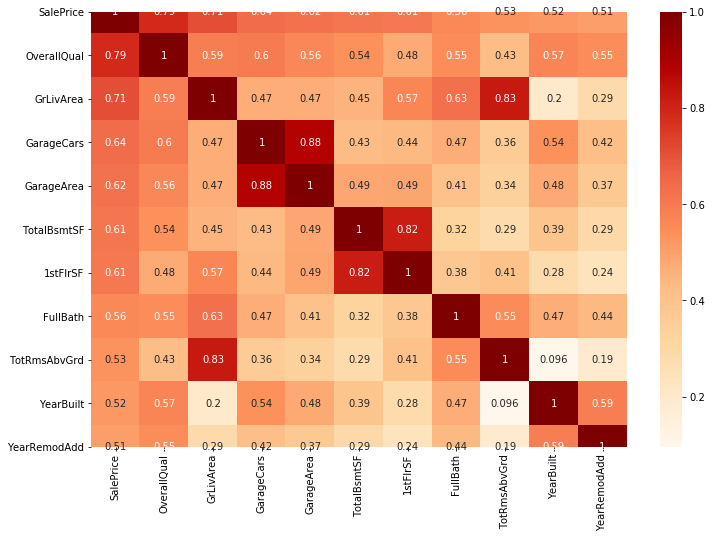

In [0]:
high_corr = df_train.corr()['SalePrice'][(abs(df_train.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)

plt.figure(figsize=(12,8));
sns.heatmap(df_train[high_corr.index].corr(), annot=True, cbar=True, cmap = 'OrRd')

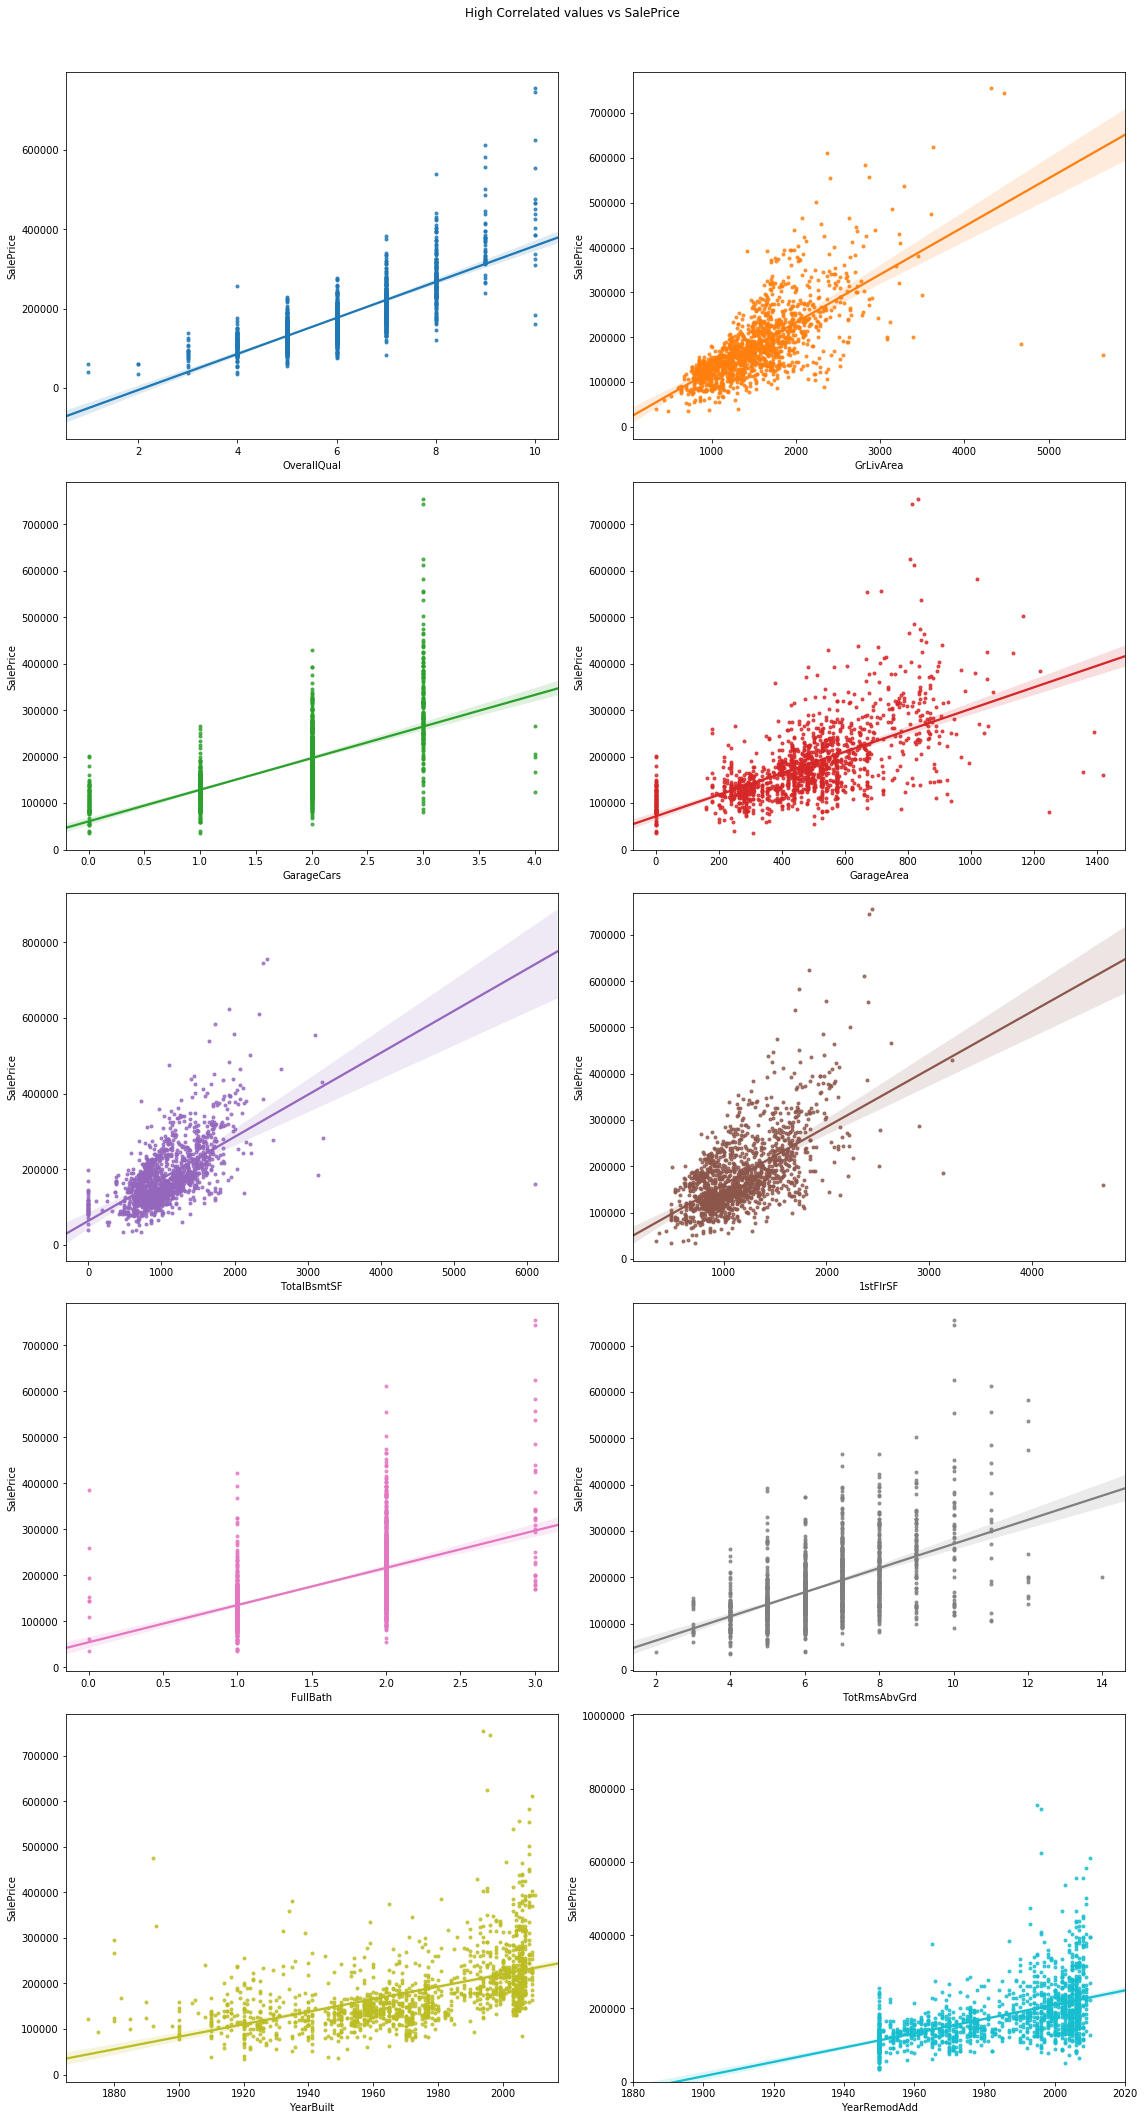

In [0]:
fig, ax = plt.subplots(5, 2, figsize=(16,30))

for idx,col in enumerate(high_corr[1:].index):
    sns.regplot(x=df_train[col], y=df_train["SalePrice"], marker='.', ax=ax[idx//2, idx%2]) 

ax[4,1].set_ylim(0,)
ax[4,1].set_xlim(1880, 2020)

fig.suptitle('High Correlated values vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

In [0]:
df_numerical = df_train.select_dtypes("number")
num_list = df_numerical.columns.tolist()

In [0]:
for feat in high_corr.index.tolist():
    num_list.remove(feat)

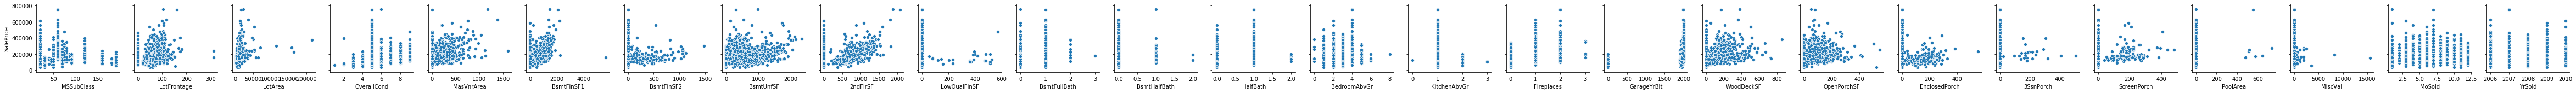

In [0]:
sns.pairplot(data=df_train, x_vars=num_list, y_vars = "SalePrice")

### Numerical

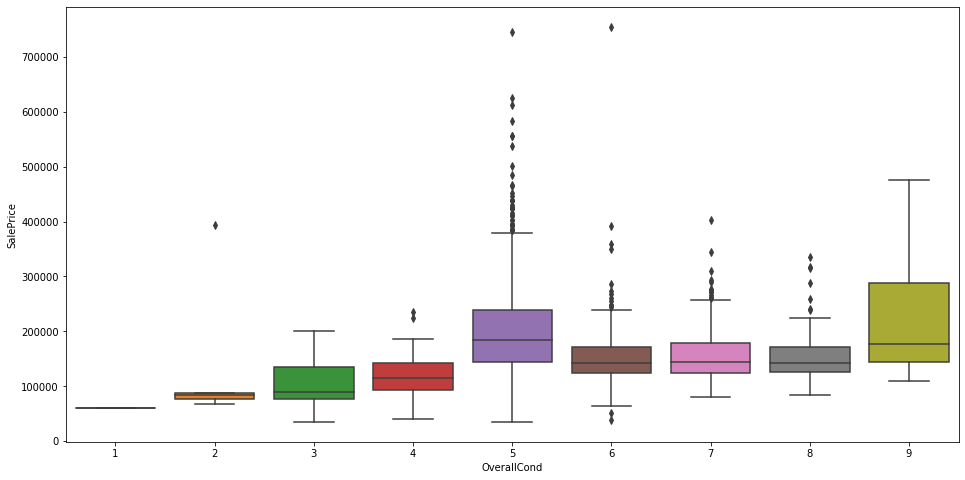

In [0]:
plt.figure(figsize=(16,8));
sns.boxplot(x=df_train['OverallCond'], y=df_train['SalePrice'])

## Categorical

In [0]:
cat_col = df_train.select_dtypes(exclude=np.number).columns.tolist()
print(cat_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


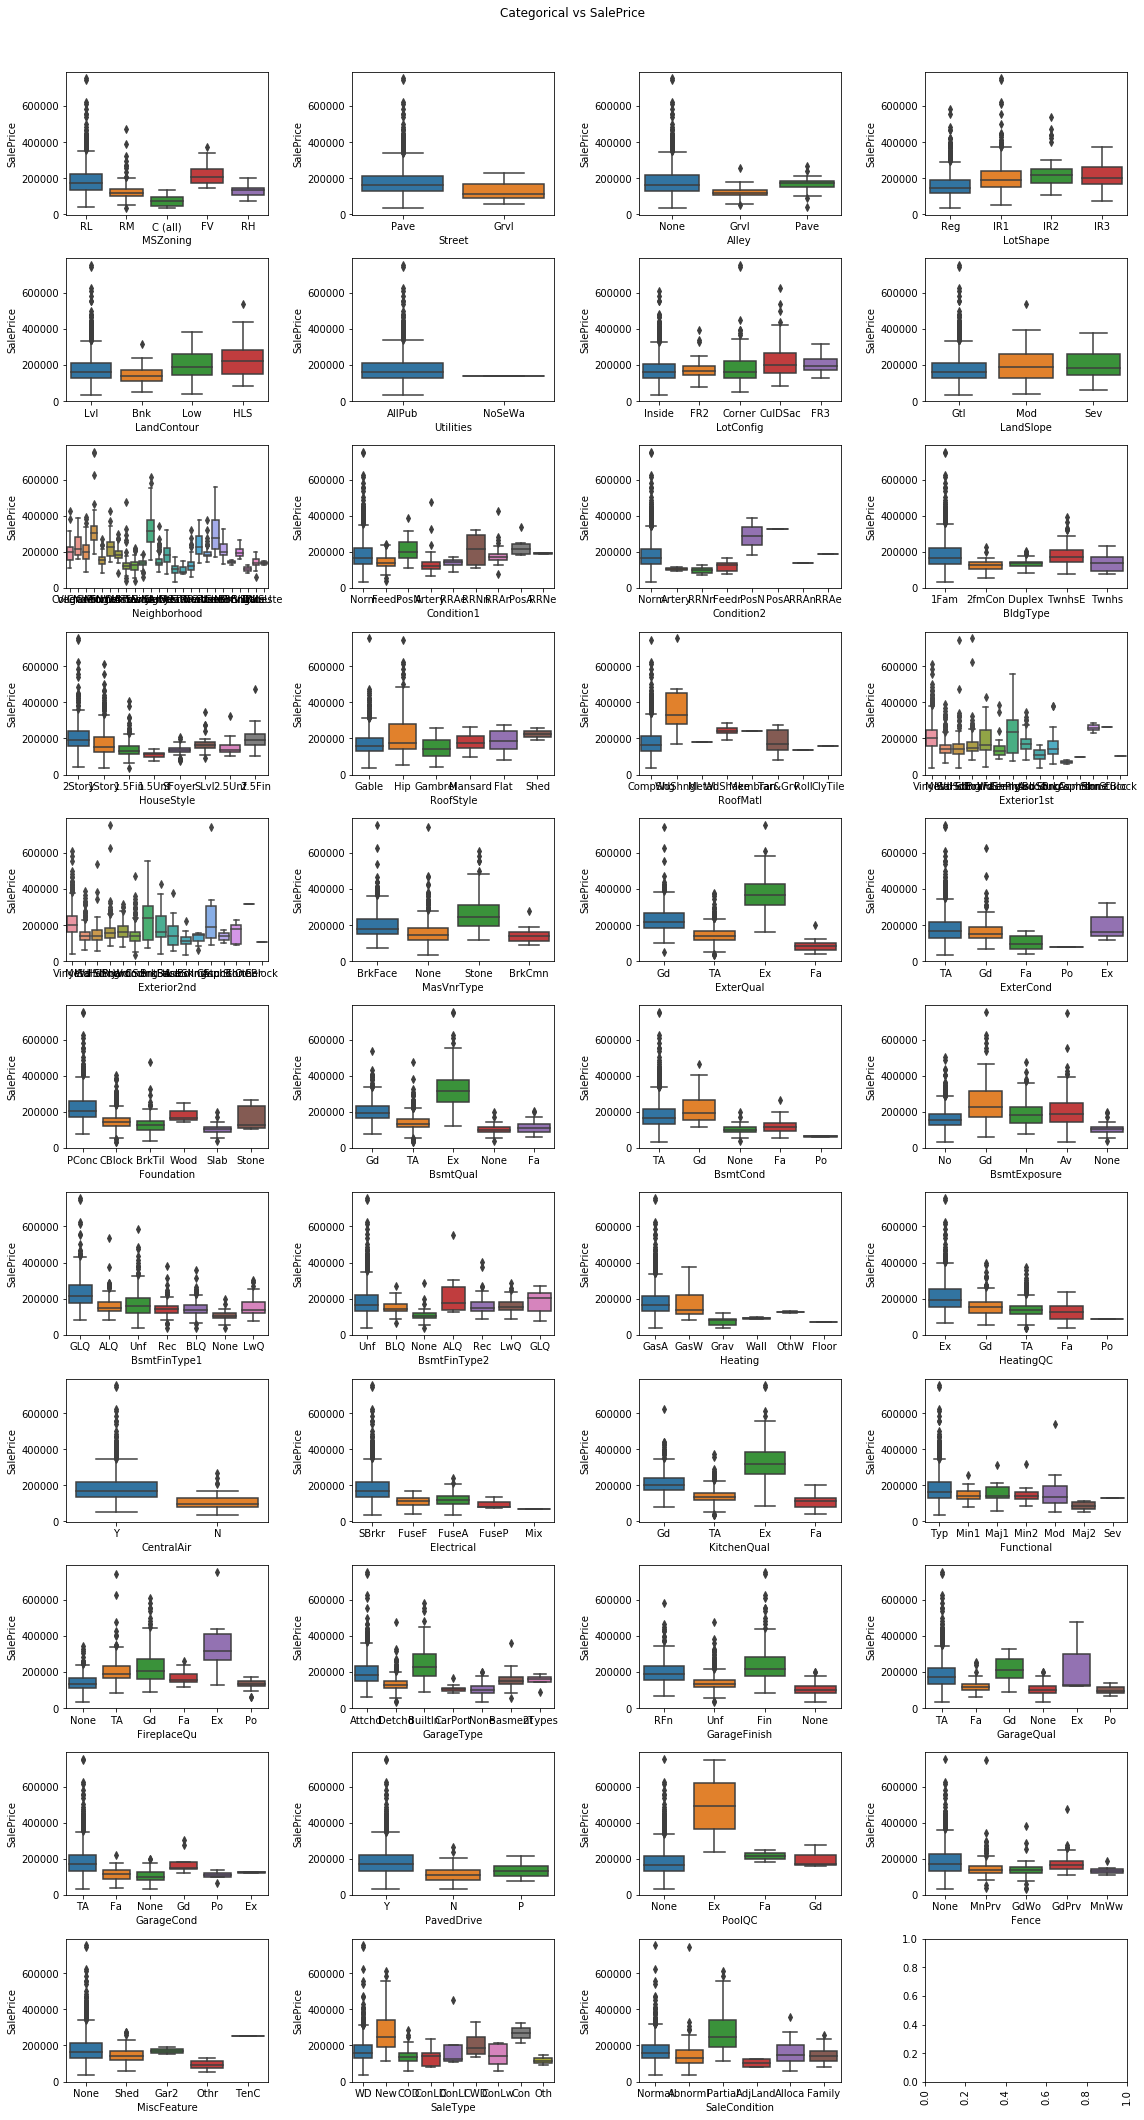

In [0]:
fig, ax = plt.subplots(11, 4, figsize=(16,30))

for idx,col in enumerate(cat_col):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx//4, idx%4]) 
plt.xticks(rotation=90)
fig.suptitle('Categorical vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Road Conditions

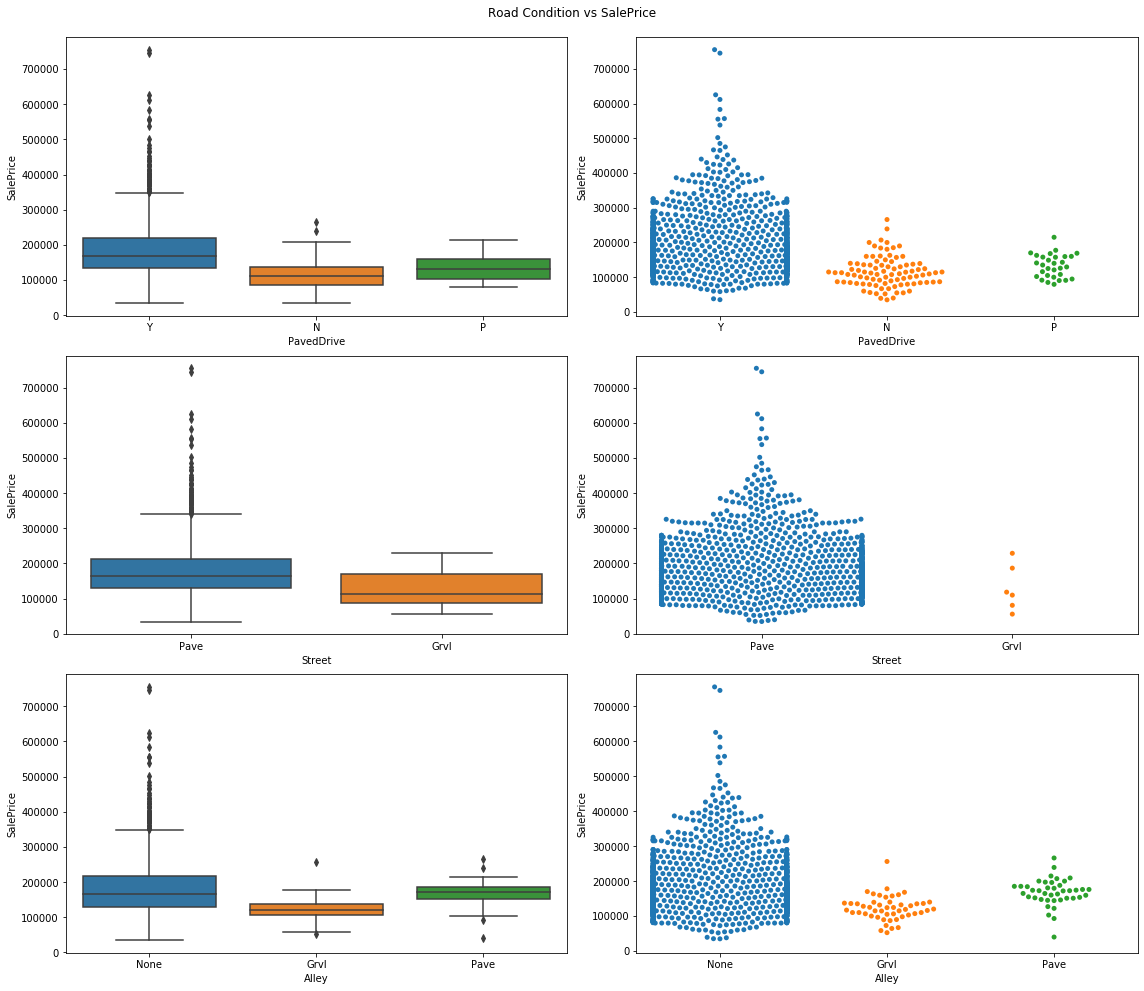

In [0]:
fig, ax = plt.subplots(3, 2, figsize=(16,14))

Paved = ['PavedDrive', 'Street', 'Alley']

for idx,col in enumerate(Paved):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Road Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Lot Condition

<Figure size 1152x576 with 0 Axes>

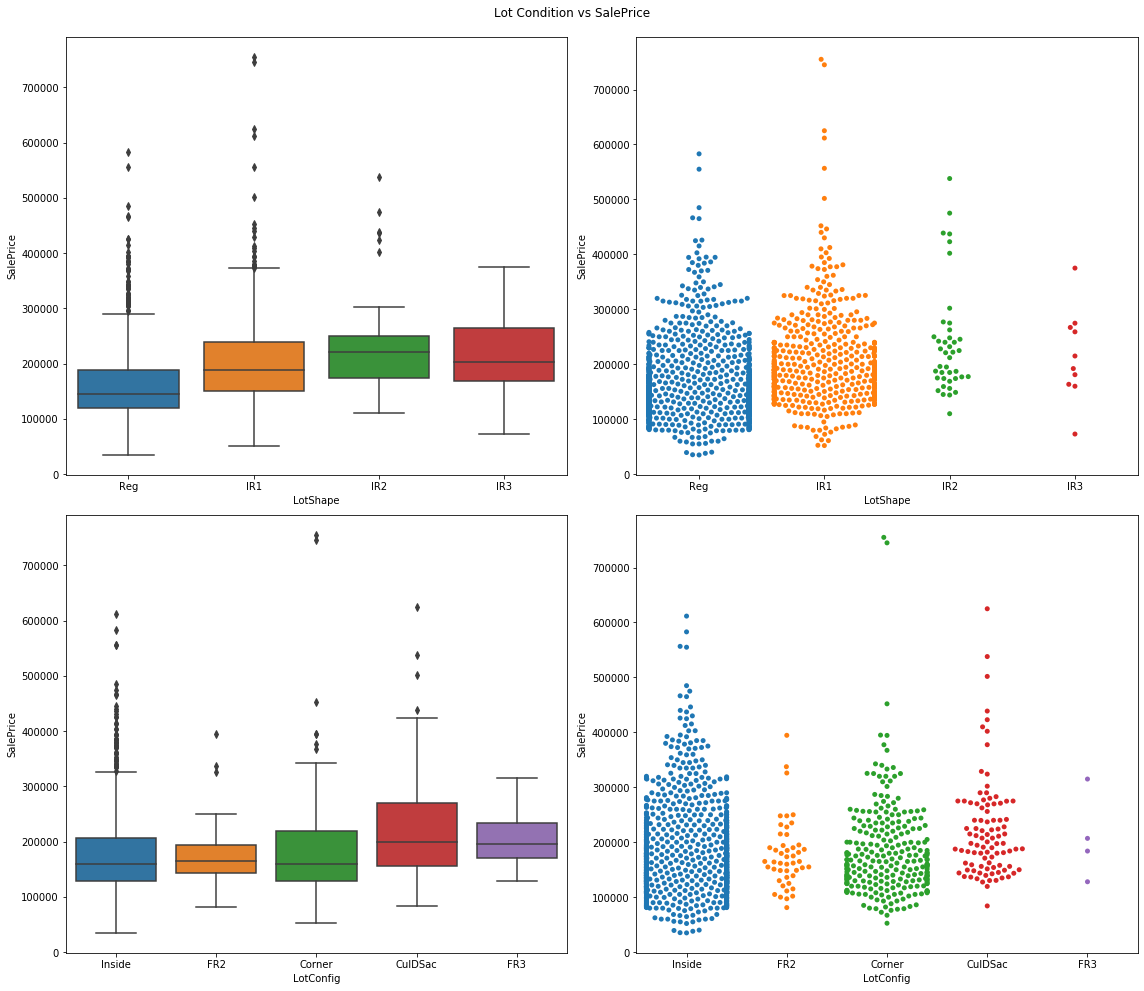

In [0]:
plt.figure(figsize=(16,8));

fig, ax = plt.subplots(2, 2, figsize=(16,14))

Lot = ['LotShape', 'LotConfig']
 
for idx,col in enumerate(Lot):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Lot Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Garage

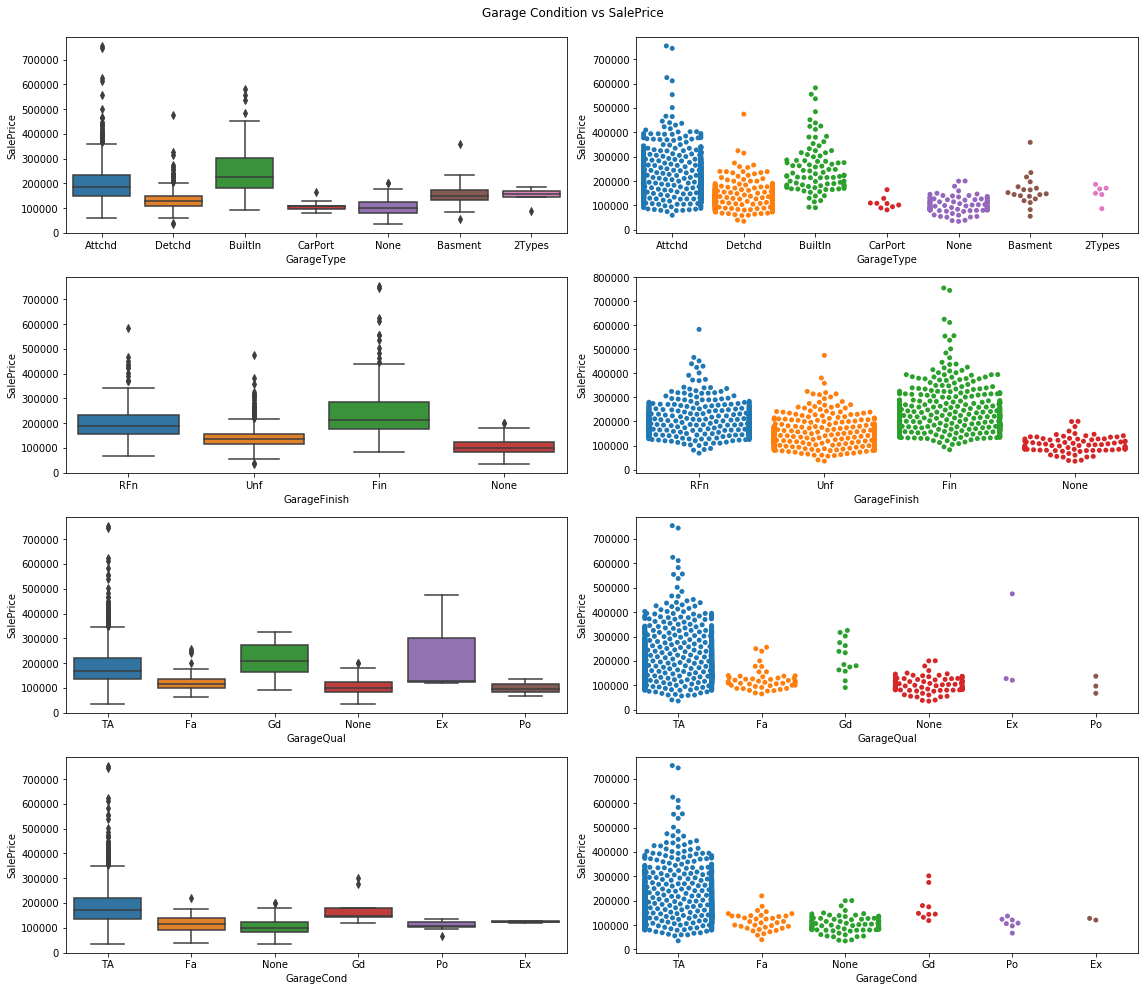

In [0]:
fig, ax = plt.subplots(4, 2, figsize=(16,14))

Garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for idx,col in enumerate(Garage):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Garage Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Bsmt

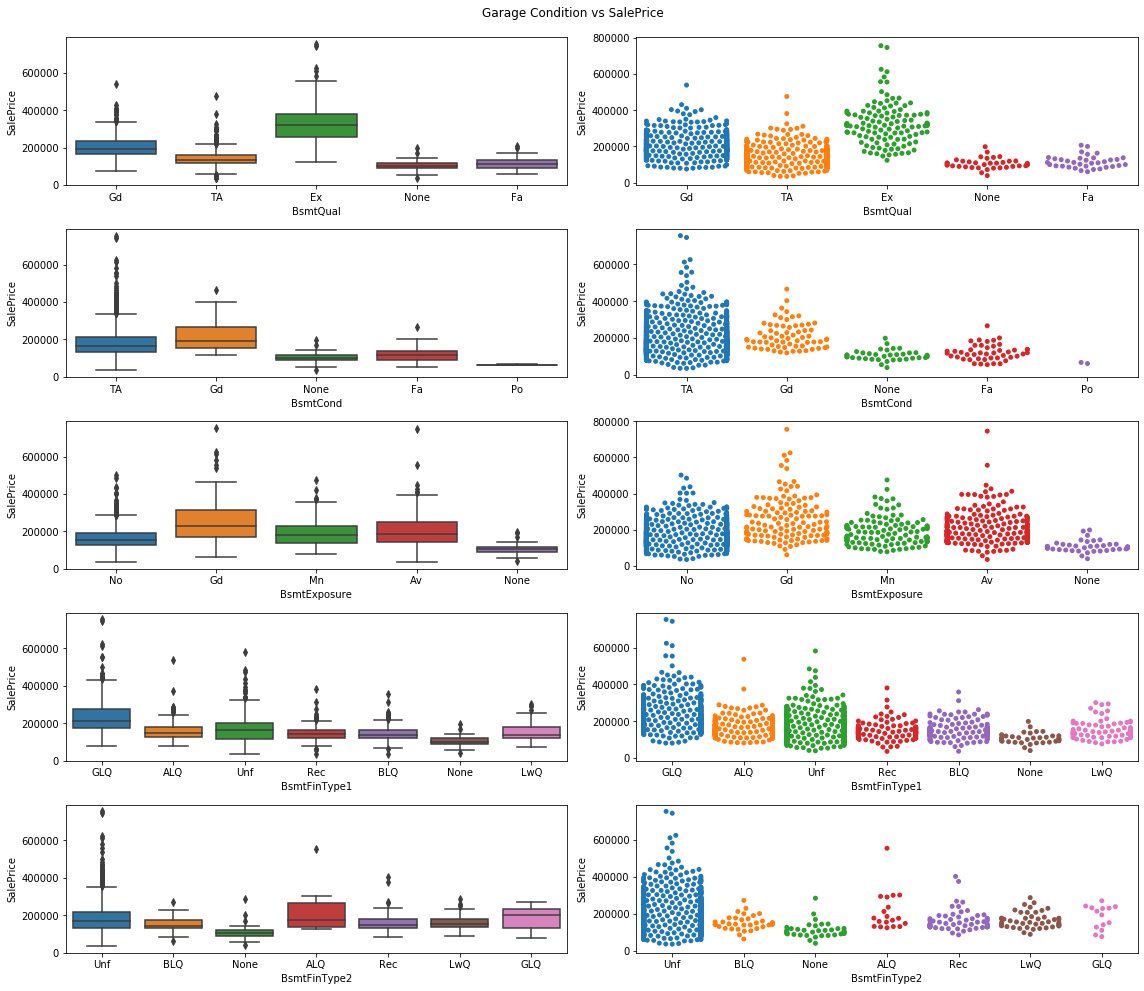

In [0]:
fig, ax = plt.subplots(5, 2, figsize=(16,14))

Basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for idx,col in enumerate(Basement):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Garage Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

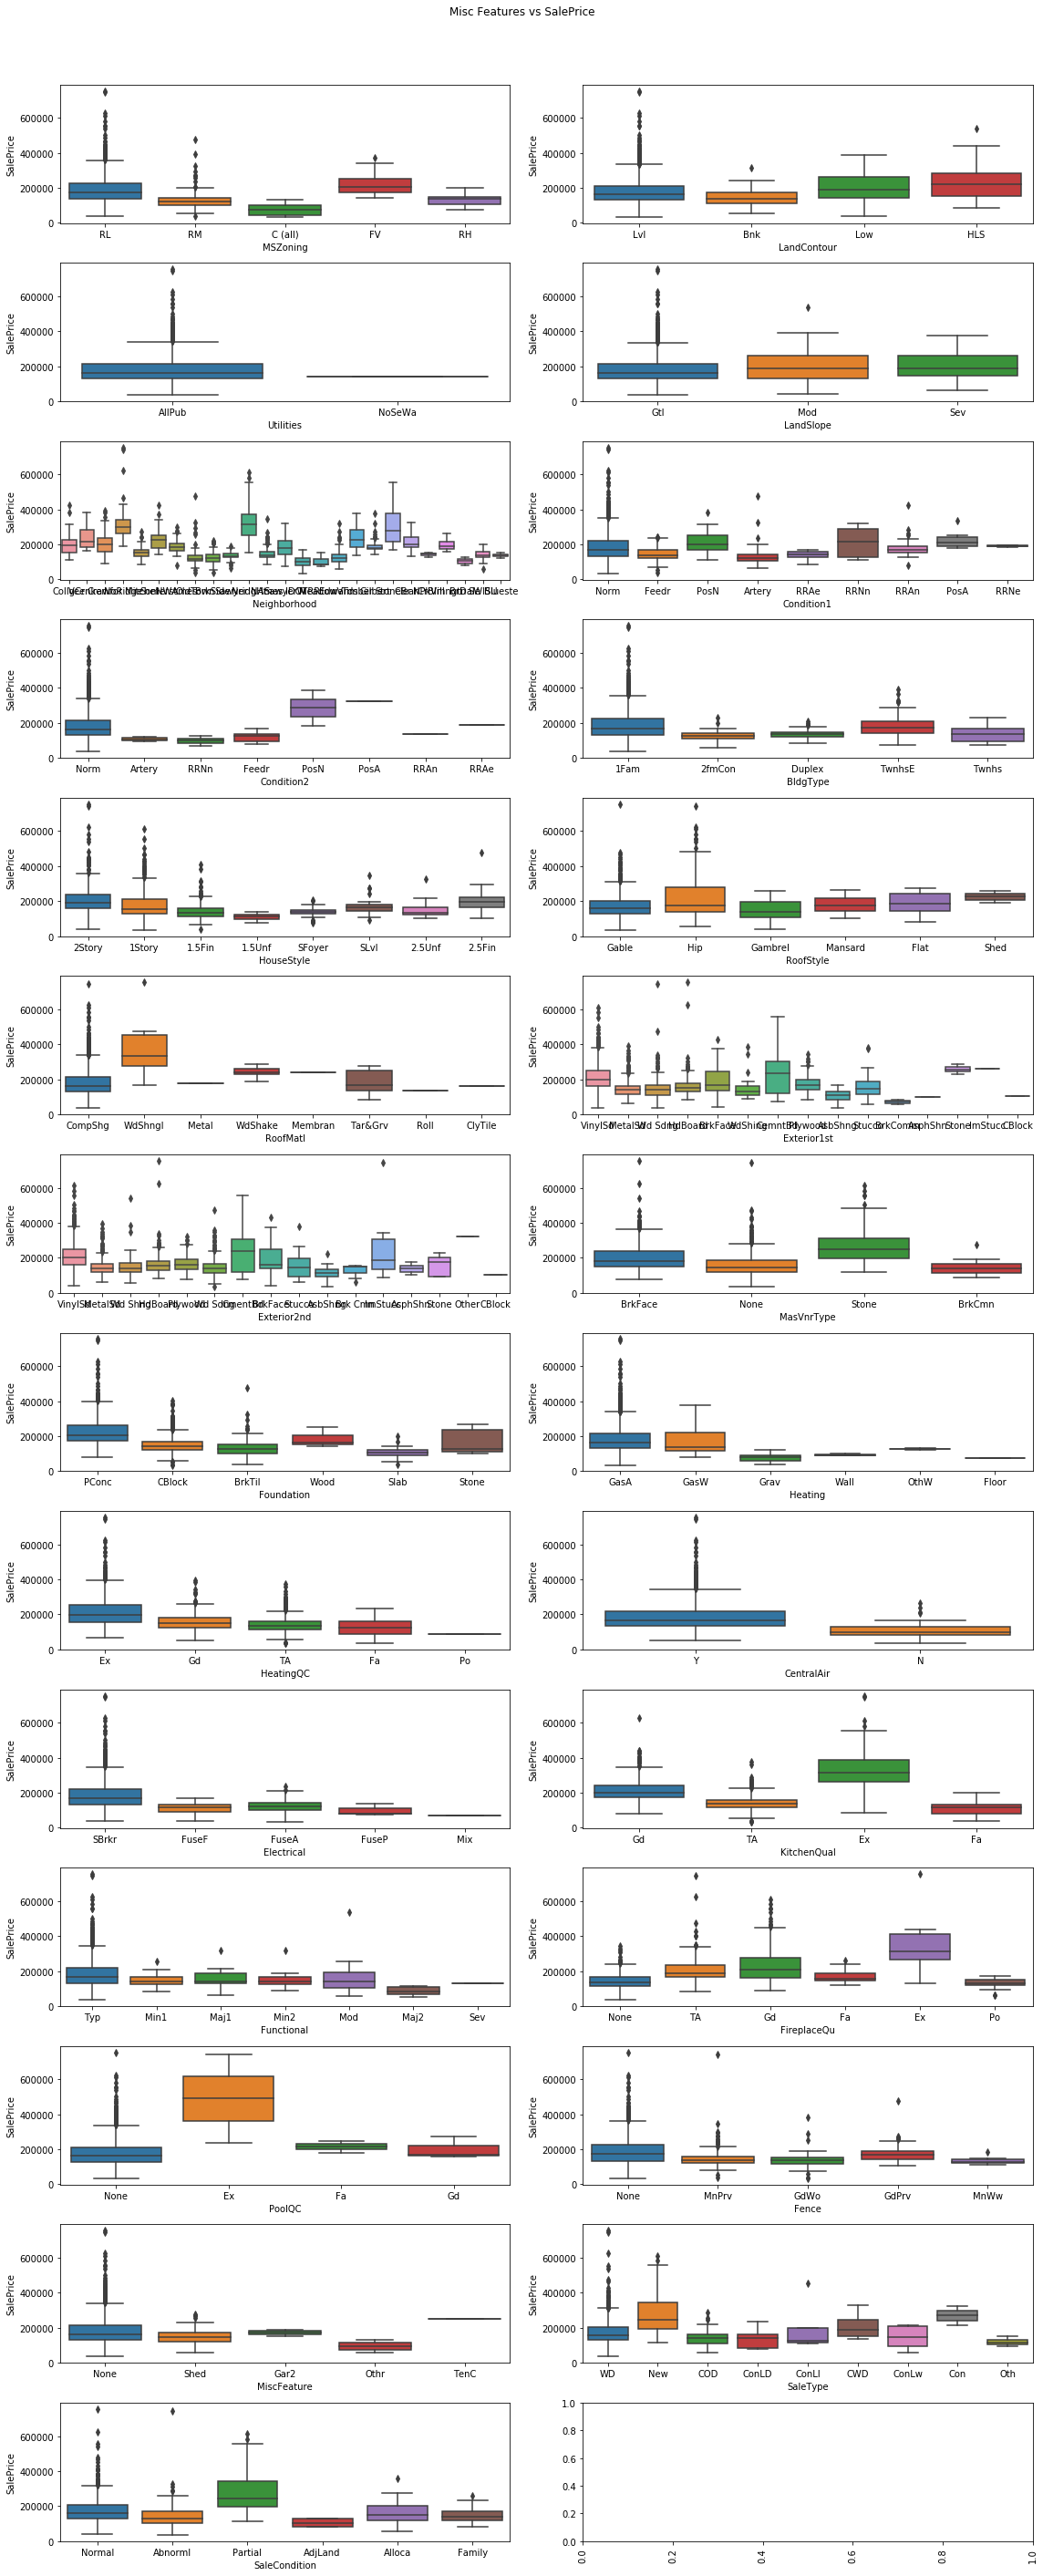

In [0]:
fig, ax = plt.subplots(14, 2, figsize=(16,40))

Misc = ['MSZoning', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 
     'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
     'Exterior1st', 'Exterior2nd', 'MasVnrType',  'Foundation', 'Heating', 
     'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
     'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for idx,col in enumerate(Misc):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx//2, idx%2]) 
    plt.xticks(rotation=90)
fig.suptitle('Misc Features vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

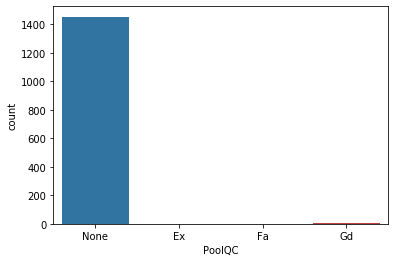

In [0]:
sns.countplot(df_train['PoolQC'])

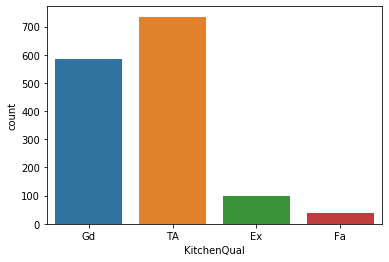

In [0]:
sns.countplot(df_train['KitchenQual'])

##### Porch

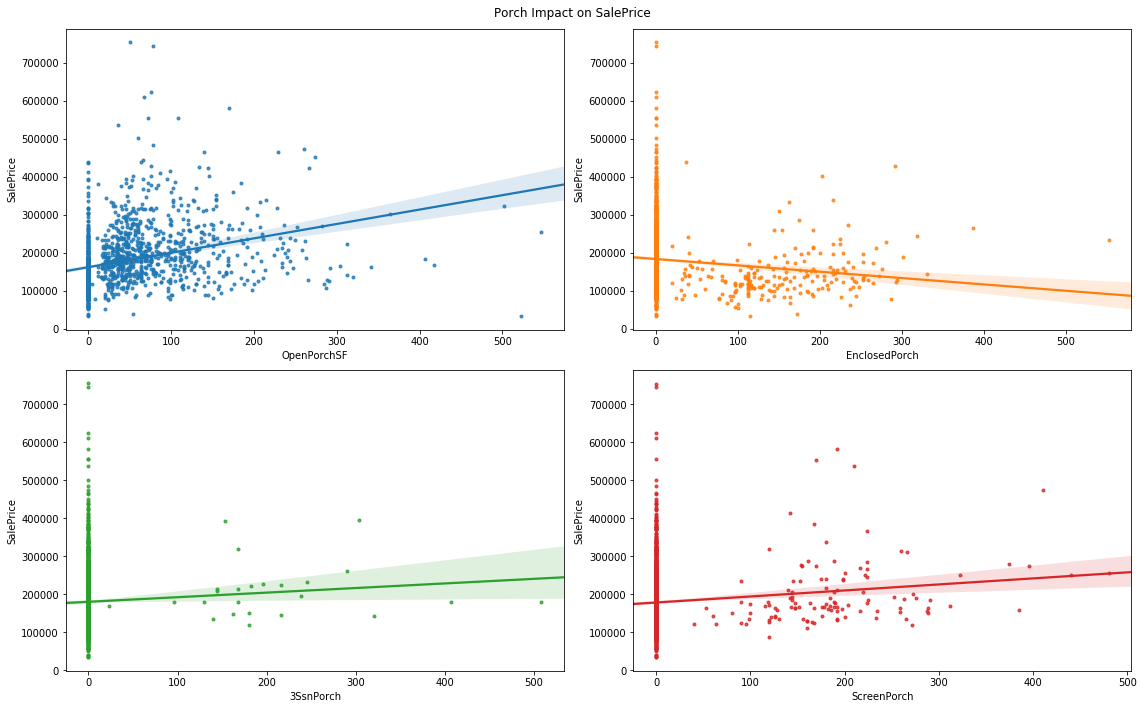

In [0]:
porchs = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

fig, ax = plt.subplots(2, 2, figsize=(16,10))

numerical = df_train.select_dtypes(include=np.number).columns.tolist()
for idx,col in enumerate(porchs):
    sns.regplot(x=df_train[col], y=df_train["SalePrice"], marker='.', ax=ax[idx//2, idx%2])  

fig.suptitle('Porch Impact on SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

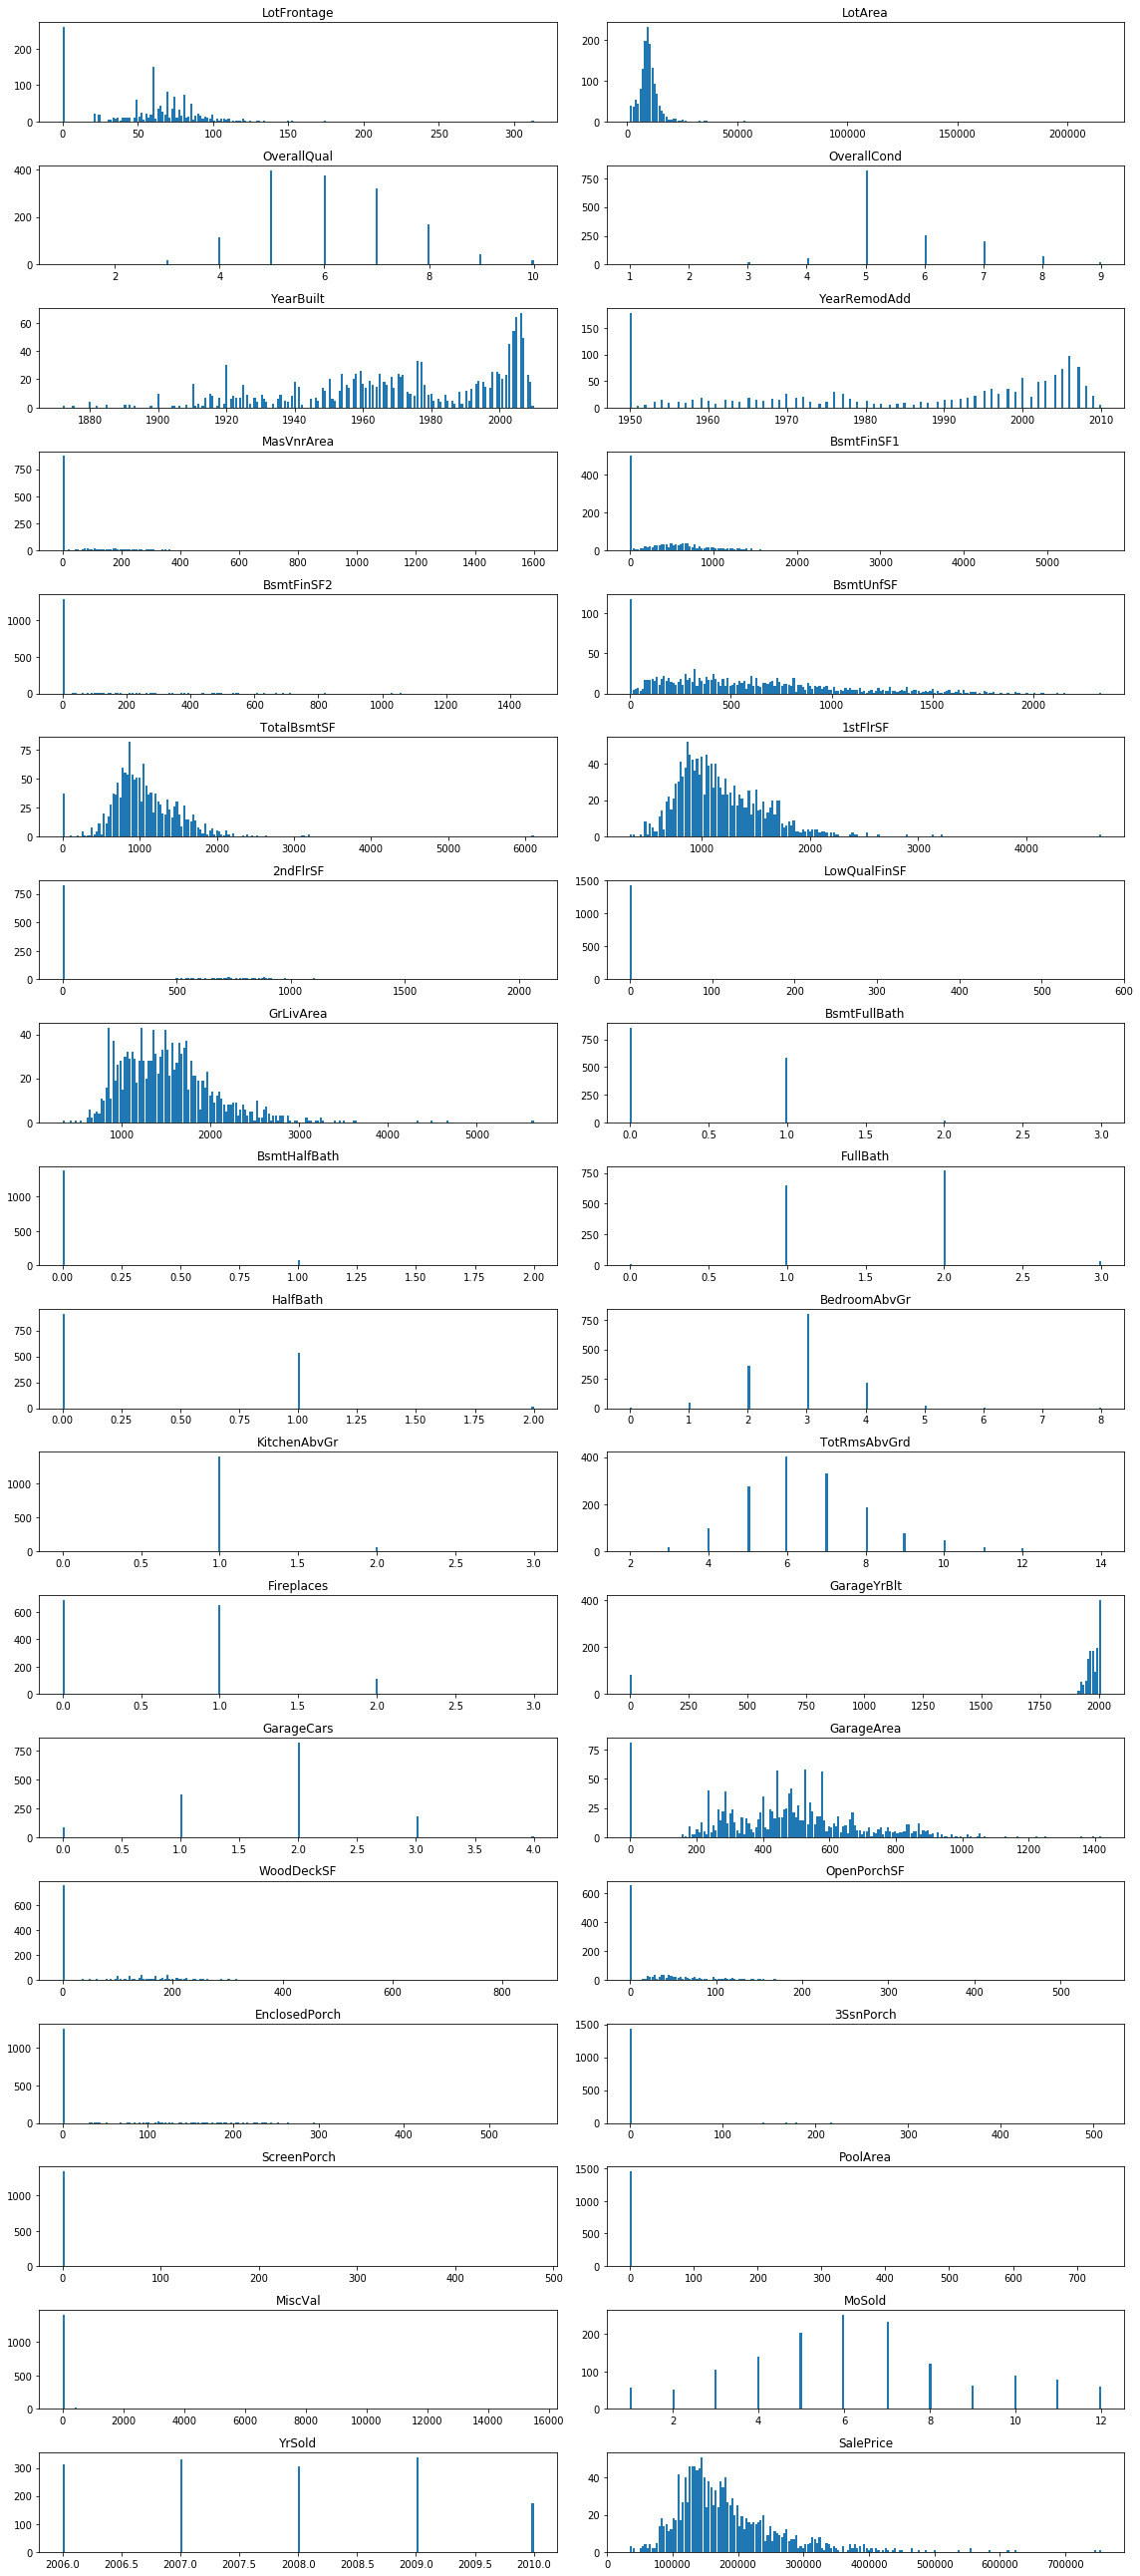

In [0]:
fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(16,36))

for idx, col in enumerate(df_numerical.columns[1:]):
    df_numerical[col].plot(kind="hist", bins=200, rwidth=.9, title=col, ax=axes[idx//2, idx%2])
    ax=axes[idx//2, idx%2].yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

## Sale Price Analysis

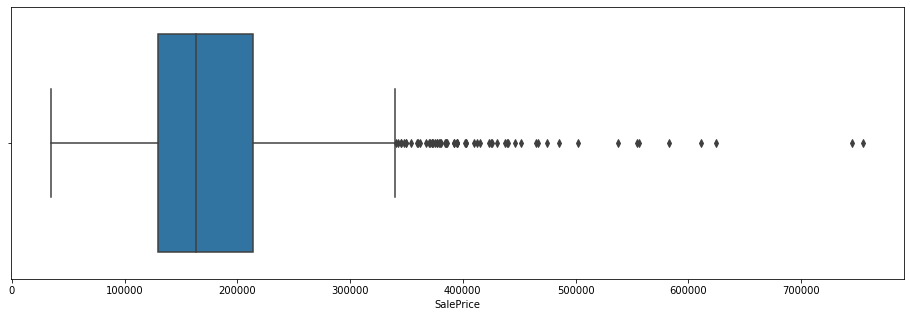

In [0]:
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(df['SalePrice'])

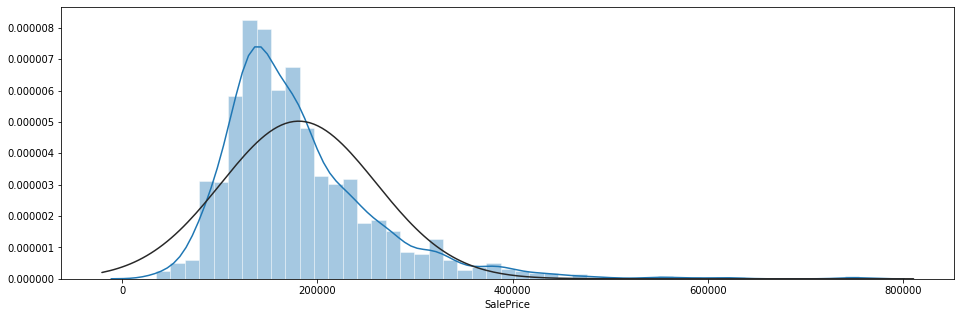

In [0]:
f, ax = plt.subplots(figsize=(16, 5))
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

Text(0.5, 1.0, 'Probability plot: SalePrice')

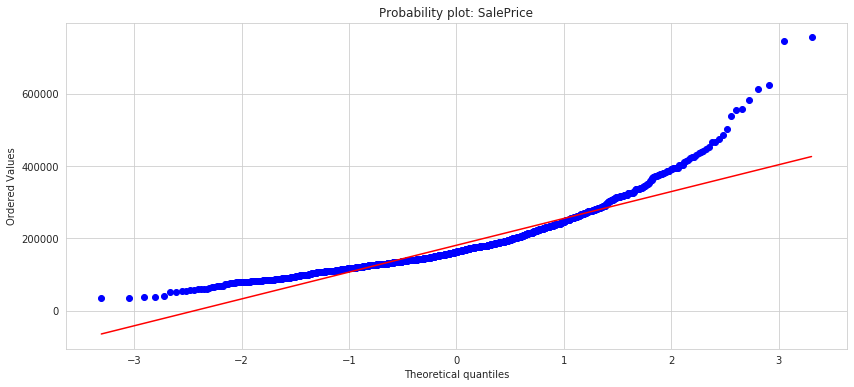

In [0]:
plt.figure(figsize=(14,6))
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

In [0]:
# calculate percentiles and IQR
q25 = np.percentile(df_train.SalePrice, 25)
q75 = np.percentile(df_train.SalePrice, 75)
iqr = q75 - q25

# calculate normal and extreme upper and lower cut off
cut_off = iqr * 3
lower_extreme_outlier = q25 - cut_off 
upper_extreme_outlier = q75 + cut_off

print(f'Percentiles:\n25th  =  {q25}\n75th  =  {q75}\n\nIQR   =   {iqr}\nlower = {lower_extreme_outlier}\nupper =  {upper_extreme_outlier}')

Percentiles:
25th  =  129975.0
75th  =  214000.0

IQR   =   84025.0
lower = -122100.0
upper =  466075.0


In [0]:
df_train[df_train.SalePrice > upper_extreme_outlier]

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
178           20       RL         63.0  ...       New       Partial    501837
185           75       RM         90.0  ...        WD        Normal    475000
440           20       RL        105.0  ...        WD        Normal    555000
691           60       RL        104.0  ...        WD        Normal    755000
769           60       RL         47.0  ...        WD        Normal    538000
798           60       RL        104.0  ...       New       Partial    485000
803           60       RL        107.0  ...       New       Partial    582933
898           20       RL        100.0  ...       New       Partial    611657
1046          60       RL         85.0  ...       New       Partial    556581
1169          60       RL        118.0  ...        WD        Normal    625000
1182          60       RL        160.0  ...        WD       Abnorml    745000
1373          20       RL          0.0  ...        WD        Normal    466500

[12 rows x 80 columns]

In [0]:
print("SalePrice:")
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

SalePrice:
Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Probability plot: SalePrice')

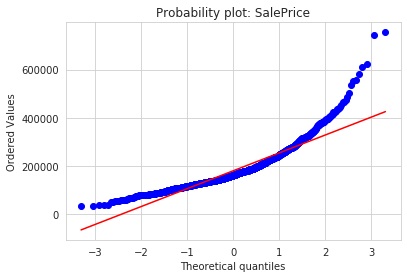

In [0]:
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

In [0]:
LogSalePrice = df_train["SalePrice"].apply(np.log)
LogSalePrice.name = 'LogSalePrice'
print("Log SalePrice:")
print("Skewness: %f" % LogSalePrice.skew())
print("Kurtosis: %f" % LogSalePrice.kurt())

Log SalePrice:
Skewness: 0.121335
Kurtosis: 0.809532


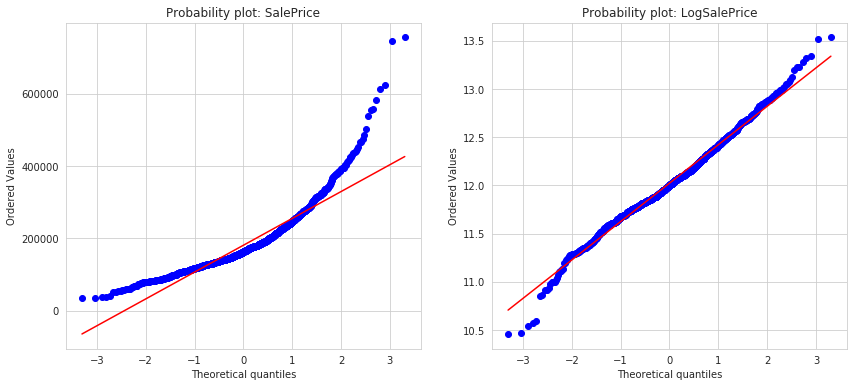

In [0]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

plt.subplot(1, 2, 2)
stats.probplot(LogSalePrice, plot=plt)
plt.title("Probability plot: LogSalePrice")
plt.show()

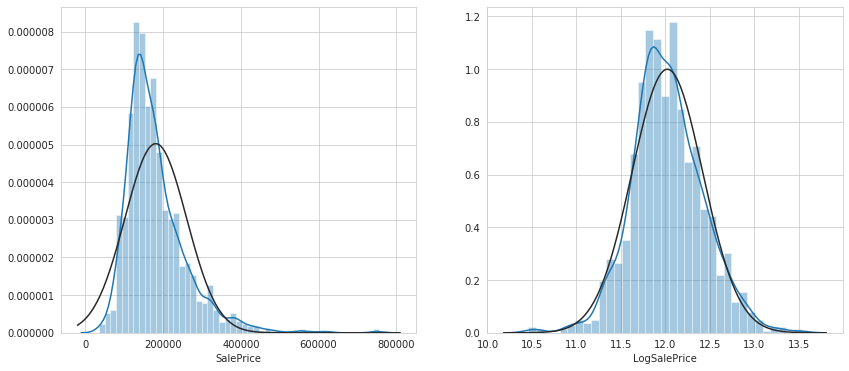

In [0]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
sns.distplot(LogSalePrice,fit=norm)

In [0]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Data Pre-processing

## Encoding

In [0]:
categoricals = df.select_dtypes(exclude=np.number).columns.tolist()
print(categoricals)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [0]:
Norminal = ['MSZoning',  'LandContour', 'Heating',  'Electrical',  
            'LotConfig',  'Neighborhood', 'Condition1', 'Condition2', 
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',  
            'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

In [0]:
Ordinal = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 
           'BsmtFinType1', 'LandSlope', 'LotShape', 'PavedDrive', 
           'PoolQC', 'KitchenQual', 'Street', 'Alley', 
           'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 
           'GarageFinish', 'Fence', 'Utilities', 'CentralAir',
           'ExterQual', 'ExterCond', 'Functional']

### Ordinal

In [0]:
for col in ['KitchenQual', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageCond', 'GarageQual']:
    df[col] = df[col].replace(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,6).tolist()).astype(int)

for col in ['ExterQual', 'ExterCond', 'HeatingQC']:
    df[col] = df[col].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,5).tolist()).astype(int)

for col in ['BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].replace(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], np.arange(0,7).tolist()).astype(int)
    
df['Street'] = df.Street.replace(['Grvl', 'Pave'], np.arange(0,2).tolist()).astype(int)
df['Alley'] = df.Alley.replace(['None', 'Grvl', 'Pave'], np.arange(0,3).tolist()).astype(int)
df['PoolQC'] = df.PoolQC.replace(['None', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,5).tolist()).astype(int)
df['Functional'] = df.Functional.replace(['None', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], np.arange(0,9).tolist()).astype(int)
df['BsmtExposure'] = df.BsmtExposure.replace(['None', 'No', 'Mn', 'Av', 'Gd'], np.arange(0,5).tolist()).astype(int)
df['Fence'] = df.Fence.replace(['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], np.arange(0,5).tolist()).astype(int)
df['Utilities'] = df.Utilities.replace(['None', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'], np.arange(0,5).tolist()).astype(int)
df['CentralAir'] = df.CentralAir.replace(['N', 'Y'], np.arange(0,2).tolist()).astype(int)
df['PavedDrive'] = df.PavedDrive.replace(['N', 'P', 'Y'], [0, 1, 2]).astype(int)
df['GarageFinish'] = df.GarageFinish.replace(['None', 'Unf', 'RFn', 'Fin'], np.arange(0,4).tolist()).astype(int)

df['LandContour'] = df.LandContour.replace(['Low', 'HLS' , 'Bnk', 'Lvl'], np.arange(0,4).tolist()).astype(int)
df['LandSlope'] = df.LandSlope.replace(['Sev', 'Mod', 'Gtl'], np.arange(0,3).tolist()).astype(int)
df['LotShape'] = df.LotShape.replace(['IR3', 'IR2', 'IR1', 'Reg'], np.arange(0,4).tolist()).astype(int)

In [0]:
categoricals = df.select_dtypes(exclude=np.number).columns.tolist()
print(categoricals)

['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']


In [0]:
[value for value in Ordinal if value in categoricals] 

[]

### Norminal

In [0]:
for category in categoricals:
    dummy = pd.get_dummies(df[category], prefix = category)
    df = pd.concat([df, dummy], axis = 1)
    df.drop(category, axis=1, inplace=True)

In [0]:
df.select_dtypes(exclude=np.number).columns.tolist()

[]

# Feature Engineering

In [0]:
non_numerical = ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
                 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
                 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
                 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
                 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
                 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities',
                'SalePrice']

In [0]:
high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
high_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

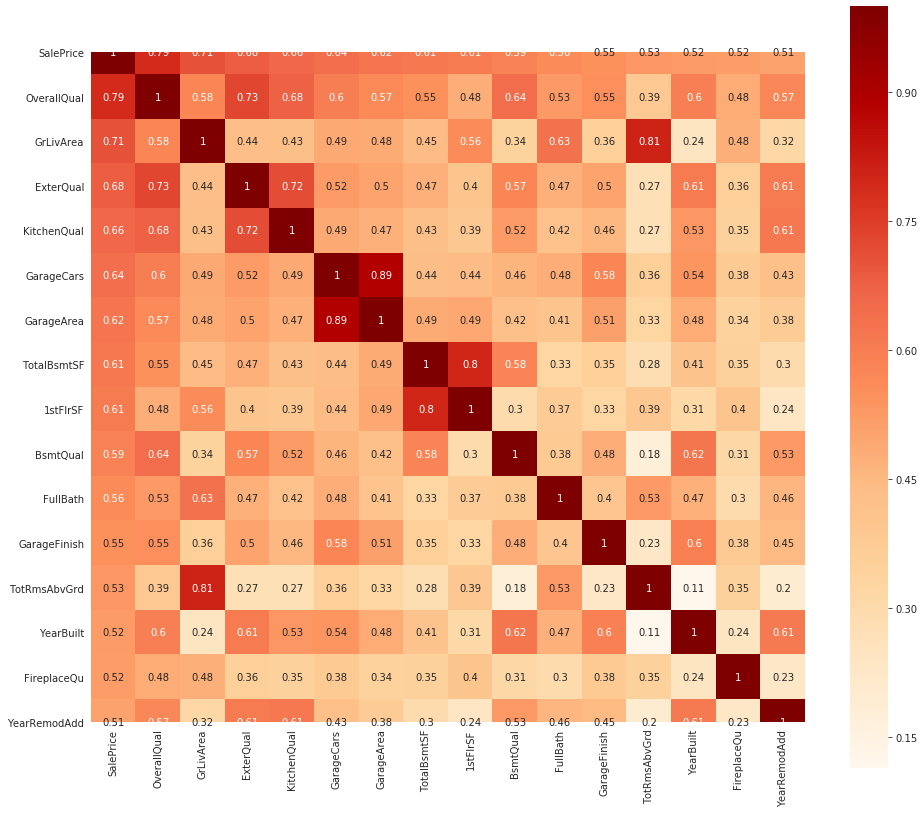

In [0]:
fig, axes = plt.subplots(figsize=(16,14))
sns.heatmap(df[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

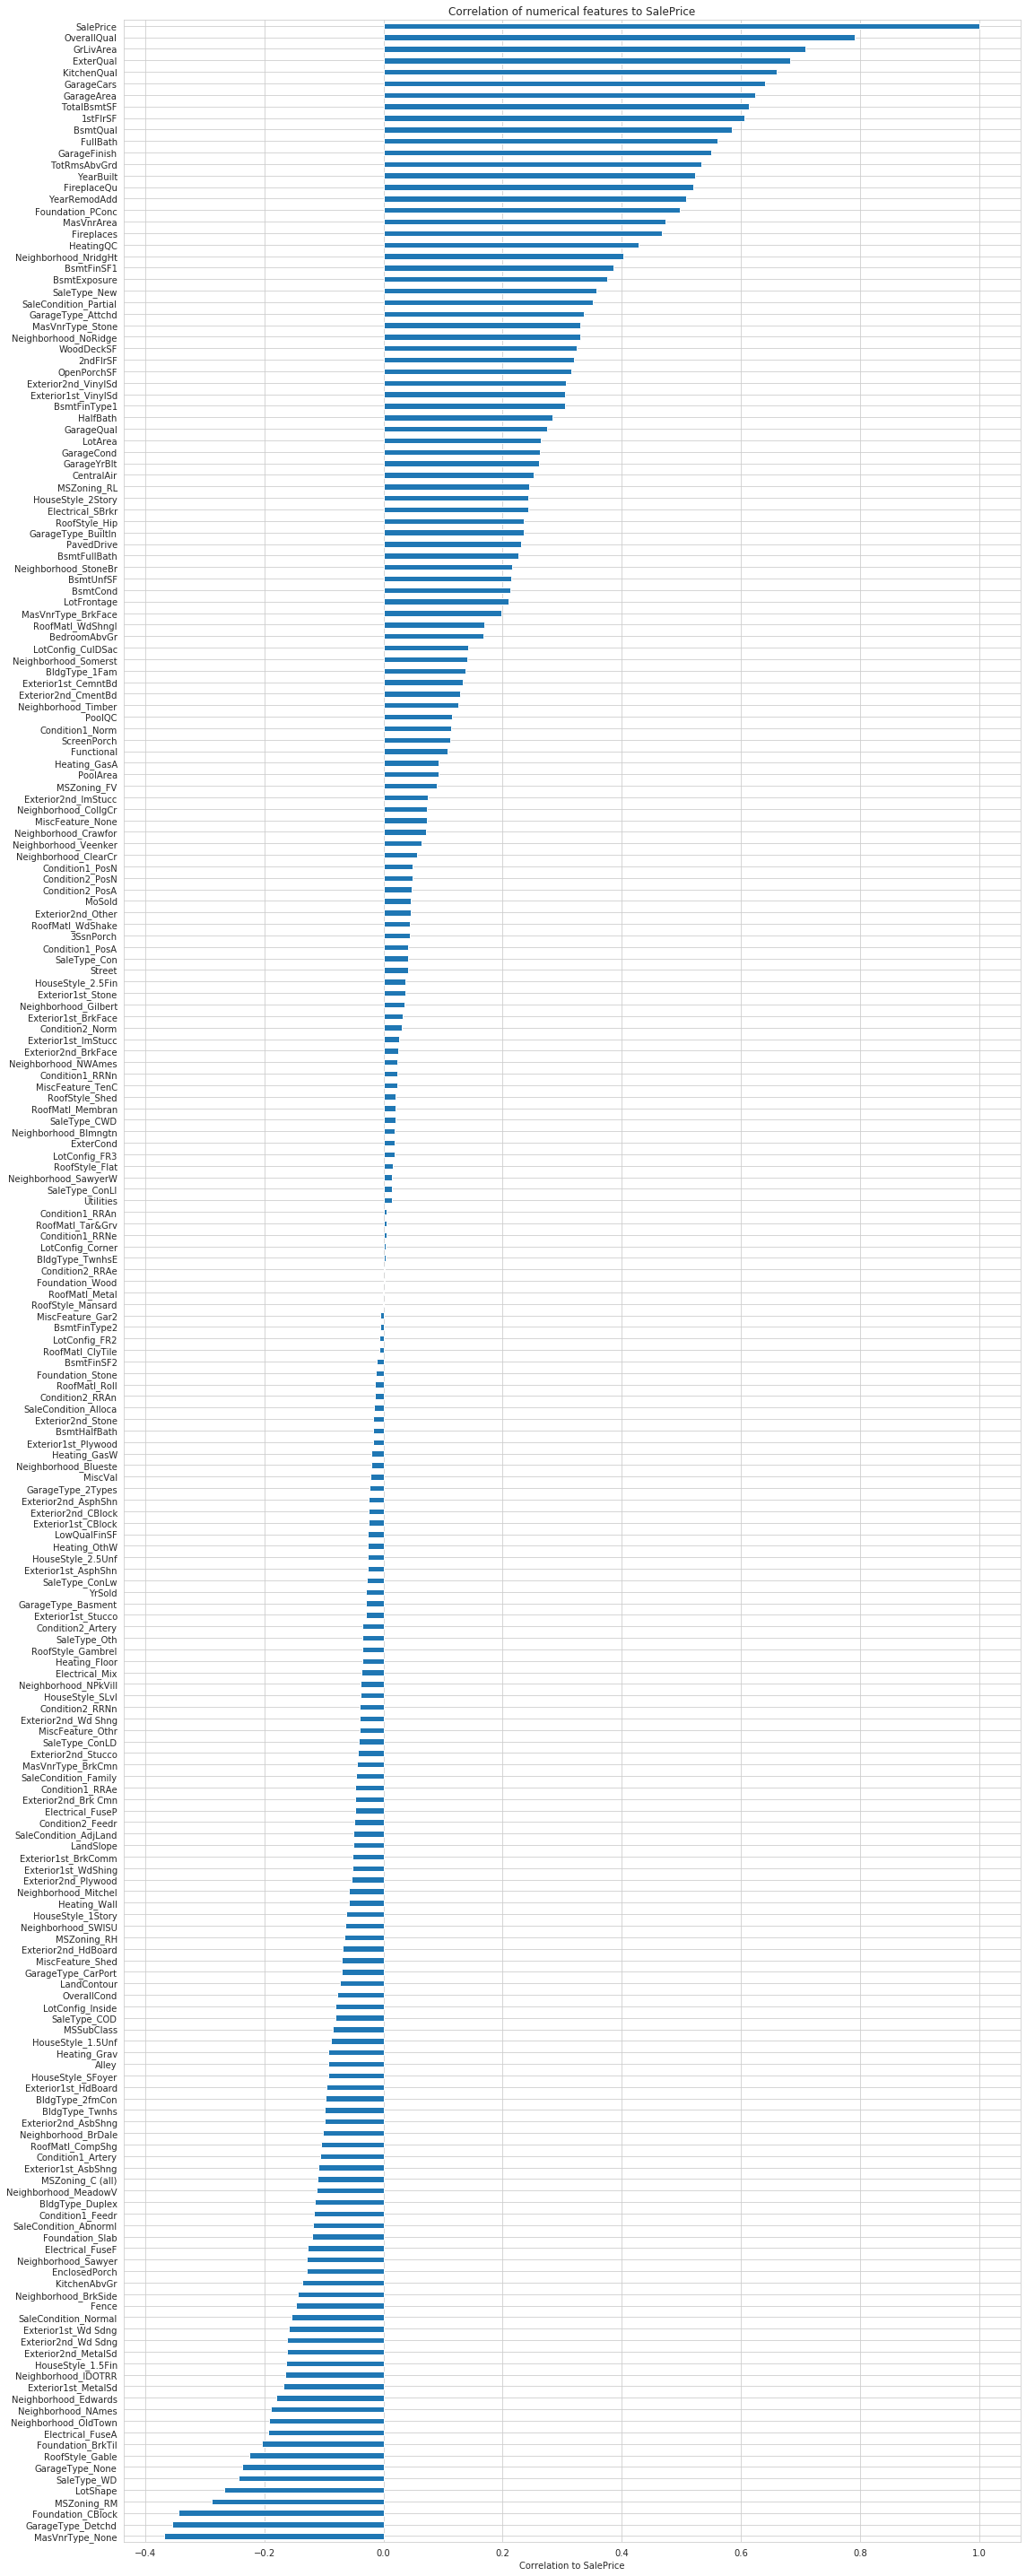

In [0]:
plt.figure(figsize=(16,40));
corr = df.corr()['SalePrice']

# high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
corr.sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

### Basement

In [0]:
df['BsmtSpace'] = df['BsmtQual'] * df['TotalBsmtSF']

### Porch

In [0]:
df['hasScreenPorch'] = df['ScreenPorch'].apply(lambda x: 0 if x > 0 else 1)
df['hasEnclosedPorch'] = df['EnclosedPorch'].apply(lambda x: 0 if x > 0 else 1)
df['hasOpenPorchSF'] = df['OpenPorchSF'].apply(lambda x: 0 if x > 0 else 1)
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']
df['hasPorch'] = df['TotalPorchSF'].apply(lambda x : 0 if x > 0 else 1)

### Surface Area

In [0]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

### has Property

In [0]:
df['hasFireplace'] = df['FireplaceQu'].apply(lambda x : 0 if x == 0 else 1)
df['hasGarage'] = df['GarageArea'].apply(lambda x : 0 if x == 0 else 1)
df['hasBasement'] = df['BsmtExposure'].apply(lambda x : 0 if x == 0 else 1)
df['hasPool'] = df['PoolQC'].apply(lambda x : 0 if x == 0 else 1)
df['hasFence'] = df['Fence'].apply(lambda x : 0 if x == 0 else 1)
df['hasRenovate'] = df ['YearRemodAdd'] - df['YearBuilt']
df['hasRenovate'] = df['hasRenovate'].apply(lambda x: 0 if x == 0 else 1)

### Quality

In [0]:
df['TotalQual'] = df['KitchenQual'] + df['ExterQual'] + df['OverallQual']
df['PaveScore'] = df['PavedDrive'] + df['Alley'] + df['Street']

## Correlation

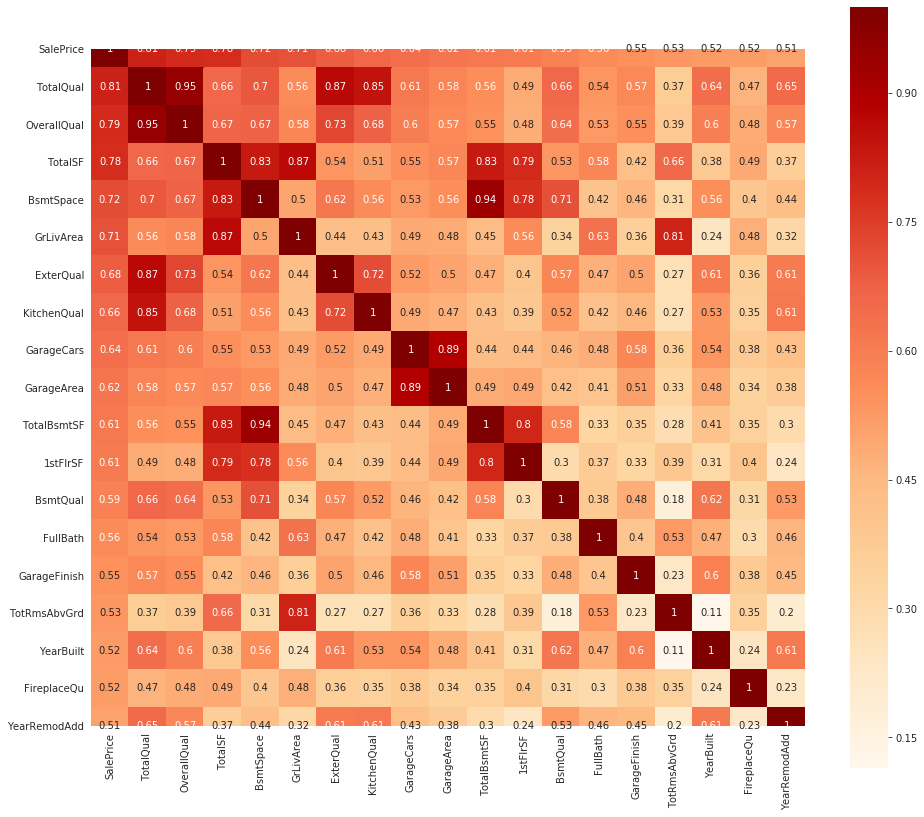

In [0]:
high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
high_corr

fig, axes = plt.subplots(figsize=(16,14))
sns.heatmap(df[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

# Prediction

## Data Splitting

In [0]:
X_col = high_corr.index.tolist()
X_col.remove('SalePrice')
y_col = 'SalePrice'

In [0]:
df_train = df[df['SalePrice'].notnull()]
df_test = df[df['SalePrice'].isnull()]

In [0]:
from sklearn.model_selection import train_test_split

X = df_train[X_col].values
y = df_train[y_col].values

X_train, X_Valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Import Library

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.metrics.scorer import neg_mean_squared_error_scorer

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb

## Baseline with Linear Regressor

In [0]:
X = df_train[["GrLivArea"]]
y = df_train.SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2750 Log Error


In [0]:
X = df_train[["BsmtSpace"]]
y = df_train.SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2792 Log Error


In [0]:
X = df_train[X_col].values

y = np.log1p(df_train.SalePrice)
metric = 'neg_mean_squared_error'
#simpleImputer()
# many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders.
clf = make_pipeline(SimpleImputer(), StandardScaler(), LinearRegression())
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.1660 Log Error


In [0]:
classifiers = [
               Ridge(), 
               Lasso(), 
               ElasticNet(),
               KernelRidge(),
               SVR(),
               RandomForestRegressor(),
               GradientBoostingRegressor(),
               xgb.XGBRegressor(objective="reg:squarederror"),
]

clf_names = [
            "ridge      ",
            "lasso      ",
            "elastic    ",
            "kernlrdg   ",
            "svr        ",
            "rndmforest ", 
            "gbm        ", 
            "xgboost    ",
]

In [0]:
X_col

['TotalQual',
 'OverallQual',
 'TotalSF',
 'BsmtSpace',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'YearBuilt',
 'FireplaceQu',
 'YearRemodAdd']

In [101]:
# X = df_train[X_col].values

#drop samePrice column & keep the rest of the columns
X = df_train.drop(["SalePrice"], axis=1)

#For real-valued input, log1p is accurate also for x so small that 1 + x == 1 in floating-point accuracy.
y = np.log1p(df_train.SalePrice)
#MSE, root square error, measure different between the value of actual observed vs the predicted value
#useful to determine wheter the model fits a not.
#the lower the better
#for instance, plotting SalesPrice(y-axis) against 

#scoring metric
metric = 'neg_mean_squared_error'

#K-fold cross-validation is a method that use in estimating prediction wrror and smoothing parameters

#purpose: use cross-validation rmse error so we can evaluate our models and pick the best tuning par so that we can further fine tune the hyperparamenters of different models
for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")




ridge       0.1424
lasso       0.1963
elastic     0.1886
kernlrdg    0.1428
svr         0.3988
rndmforest  0.1465
gbm         0.1297
xgboost     0.1284


In [100]:
 #Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.
 # Lasso Regression can also be used for feature selection because the coeﬃcients of less important features are reduced to zero. Eg: coef!=0
 from sklearn.linear_model import LassoCV
 #from previous lasso config
 previousLassoConfig = Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
                        normalize=False, positive=False, precompute=False, random_state=None,
                        selection='cyclic', tol=0.0001, warm_start=False)
 #from previous config
 kfold = KFold(n_splits=5, shuffle=True, random_state=1)


#new alpha values
 model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, y)
 
 result = np.sqrt(-cross_val_score(model_lasso, X, y, cv=kfold, scoring=metric)).mean()
 coef = pd.Series(model_lasso.coef_, index = X.columns)

 print(result)
 print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


0.13662797062711035
Lasso picked 104 variables and eliminated the other 130 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

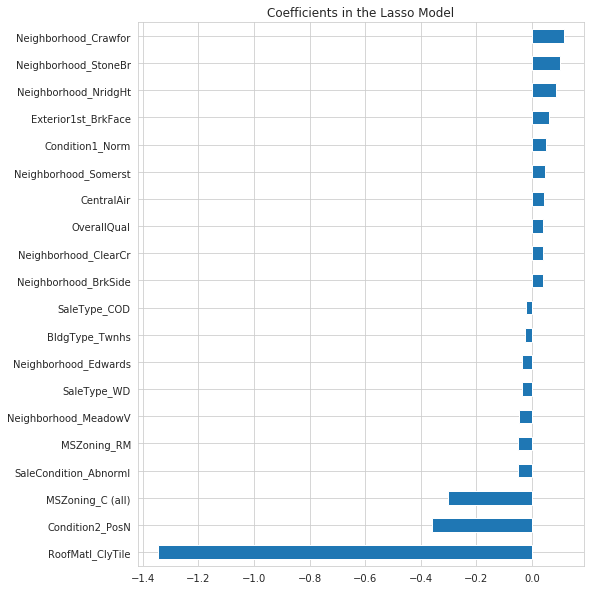

In [104]:
import matplotlib
import matplotlib.pyplot as plt

#plot Lasso selected features
important_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [0]:
#select those columns that is in X_col & plot again sales price
X = df_train[X_col].values
y = np.log1p(df_train.SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1658
lasso       0.2010
elastic     0.1949
kernlrdg    0.1682
svr         0.3934
rndmforest  0.1693
gbm         0.1469
xgboost     0.1476


In [106]:
#remove those extreme values for GrLiveArea > 4000
# agin by performing calculation of RMSE, ridge result improve significantly
X = df_train[df_train.GrLivArea < 4000].drop(["SalePrice"], axis=1)
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
#     print(clf)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
ridge       0.1183
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
lasso       0.1666
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
elastic     0.1568
KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)
kernlrdg    0.1186
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
svr         0.3955
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
              

In [144]:
#Ridge
#from previous config
from sklearn.linear_model import Ridge

rdg= Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
metric = 'neg_mean_squared_error'

alpha = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

 
cv_ridge = [np.sqrt(-cross_val_score(Ridge(alpha = alpha), X, y, cv=kfold, scoring=metric)).mean()
          for alpha in alphas]
 
print("Smallest element is: ", min(cv_ridge)) 

Smallest element is:  0.11355029464299213


Text(0, 0.5, 'rmse')

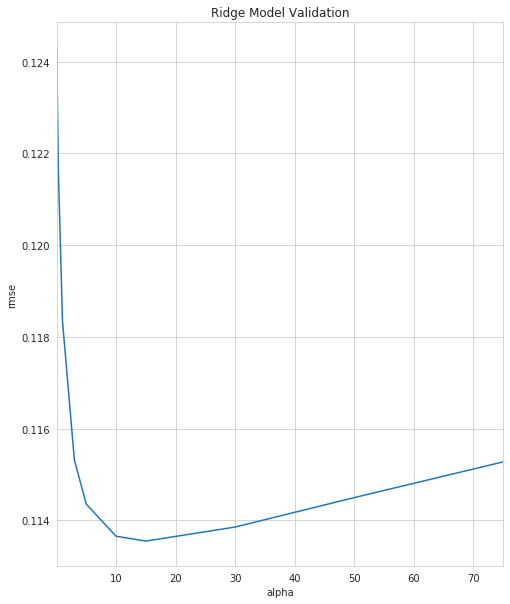

In [145]:
#plot Ridge alpha values
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Model Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")


In [0]:
X = df_train[df_train.GrLivArea < 4000].drop(["SalePrice"], axis=1)[X_col]
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1469
lasso       0.1753
elastic     0.1676
kernlrdg    0.1488
svr         0.3902
rndmforest  0.1588
gbm         0.1461
xgboost     0.1461


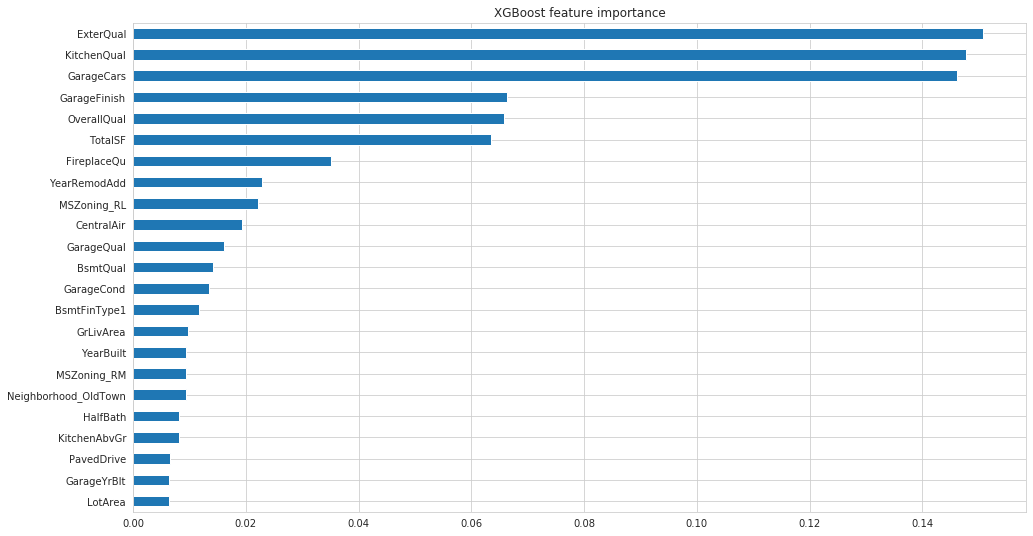

In [0]:
from scipy.stats import skew
from scipy.special import boxcox1p

X = df_train[df_train.GrLivArea < 4000].drop(["SalePrice", "TotalQual"], axis=1).copy()
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)

# again we apply the boxcox transformation
sk = pd.DataFrame(X.iloc[:, :60].skew(), columns=["skewness"])
sk = sk[sk.skewness > .75]
for feature_ in sk.index:
    X[feature_] = boxcox1p(X[feature_], 0.15)

clf = xgb.XGBRegressor(objective="reg:squarederror", n_jobs=-1)
coeffs = clf.fit(X, y).feature_importances_
df_co = pd.DataFrame(coeffs, columns=["importance_"])
df_co.index = X.columns
df_co.sort_values("importance_", ascending=True, inplace=True)

plt.figure(figsize=(16,9))
df_co.iloc[210:, :].importance_.plot(kind="barh")
plt.title(f"XGBoost feature importance")
plt.show()

## Ridge regression

## Support Vector Regressor

## Lasso regression

# Data Pre-Processing

# Prediction

## XGBoost

In [0]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

[06:07:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_Valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 19115.336352204624


In [0]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

[06:07:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_Valid, y_valid)],
             verbose=False)

[06:07:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_Valid, y_valid)], 
             verbose=False)

[06:07:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_Valid, y_valid)], 
             verbose=False)

[06:07:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## RandomForestRegressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
RFR = RandomForestRegressor(n_estimators = 300, random_state = 0)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
y_pred = RFR.predict(X_Valid)

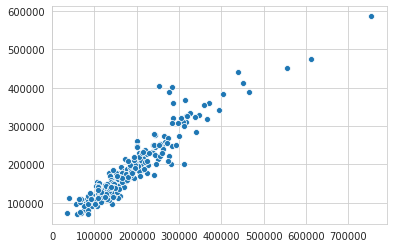

In [0]:
sns.scatterplot(y_valid, y_pred)

In [0]:
sum((y_pred-y_valid)**2)

263539810622.65918